In [1]:
# Name: Nalawade Prafulla Chandrashekhar.
# B.E.A.I.& D.S.
# Roll No.: 42
# Practical No.2

In [94]:
# A. Predict the price of the Uber ride from a given pickup point to the agreed drop-off 
# location. Perform following tasks:  

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
df=pd.read_csv(r"C:\Users\PRAFULL\OneDrive\Desktop\B.E.A.I. & D.S\CL - I Datasets\uber.csv")

### 1. Pre-process the dataset. 

In [96]:
df.head(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [97]:
df.tail()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1
199999,11951496,2010-05-15 04:08:00.00000076,14.1,2010-05-15 04:08:00 UTC,-73.984395,40.720077,-73.985508,40.768793,1


In [98]:
df.dtypes

Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [99]:
df.shape

(200000, 9)

In [100]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0                            key  fare_amount  \
0         24238194    2015-05-07 19:52:06.0000003          7.5   
1         27835199    2009-07-17 20:04:56.0000002          7.7   
2         44984355   2009-08-24 21:45:00.00000061         12.9   
3         25894730    2009-06-26 08:22:21.0000001          5.3   
4         17610152  2014-08-28 17:47:00.000000188         16.0   
...            ...                            ...          ...   
199995    42598914   2012-10-28 10:49:00.00000053          3.0   
199996    16382965    2014-03-14 01:09:00.0000008          7.5   
199997    27804658   2009-06-29 00:42:00.00000078         30.9   
199998    20259894    2015-05-20 14:56:25.0000004         14.5   
199999    11951496   2010-05-15 04:08:00.00000076         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC  

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [102]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [103]:
# Handle missing values

In [104]:

df=df.drop(['Unnamed: 0','key','pickup_datetime'],axis=1)


### 2. Identify outliers.

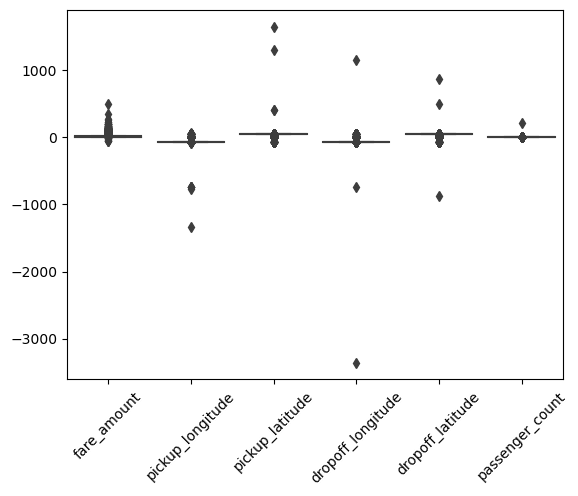

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box Plot
sns.boxplot(data=df)
# Adjust rotation angle (positive for rightward rotation)
plt.xticks(rotation=45)  # Example: Rotate 45 degrees rightward
plt.show()

In [106]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [107]:
#handling outliers
numerical_cols = df.select_dtypes(include=[np.number]).columns


In [108]:
def handle_outliers_iqr(df, num_cols):
    for col in num_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cast lower_bound to the same dtype as the column before assignment
        lower_bound = lower_bound.astype(df[col].dtype)

        df.loc[df[col] < lower_bound, col] = lower_bound
        df.loc[df[col] > upper_bound, col] = upper_bound
    return df

df = handle_outliers_iqr(df.copy(), numerical_cols)


C:\Users\PRAFULL\AppData\Local\Temp\ipykernel_14652\1185638616.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] > upper_bound, col] = upper_bound


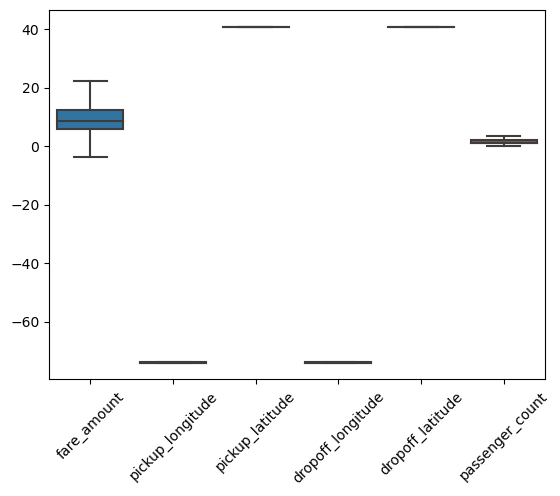

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box Plot
sns.boxplot(data=df)
# Adjust rotation angle (positive for rightward rotation)
plt.xticks(rotation=45)  # Example: Rotate 45 degrees rightward
plt.show()

### 3. Check the correlation.

In [110]:
correlation_matrix = df.corr()
for col in df.columns:
        
    print(correlation_matrix[col])
    print()

fare_amount          1.000000
pickup_longitude     0.154069
pickup_latitude     -0.110842
dropoff_longitude    0.218681
dropoff_latitude    -0.125874
passenger_count      0.015778
Name: fare_amount, dtype: float64

fare_amount          0.154069
pickup_longitude     1.000000
pickup_latitude      0.259497
dropoff_longitude    0.425622
dropoff_latitude     0.073309
passenger_count     -0.013213
Name: pickup_longitude, dtype: float64

fare_amount         -0.110842
pickup_longitude     0.259497
pickup_latitude      1.000000
dropoff_longitude    0.048889
dropoff_latitude     0.515736
passenger_count     -0.012889
Name: pickup_latitude, dtype: float64

fare_amount          0.218681
pickup_longitude     0.425622
pickup_latitude      0.048889
dropoff_longitude    1.000000
dropoff_latitude     0.245670
passenger_count     -0.009304
Name: dropoff_longitude, dtype: float64

fare_amount         -0.125874
pickup_longitude     0.073309
pickup_latitude      0.515736
dropoff_longitude    0.245670
dropo

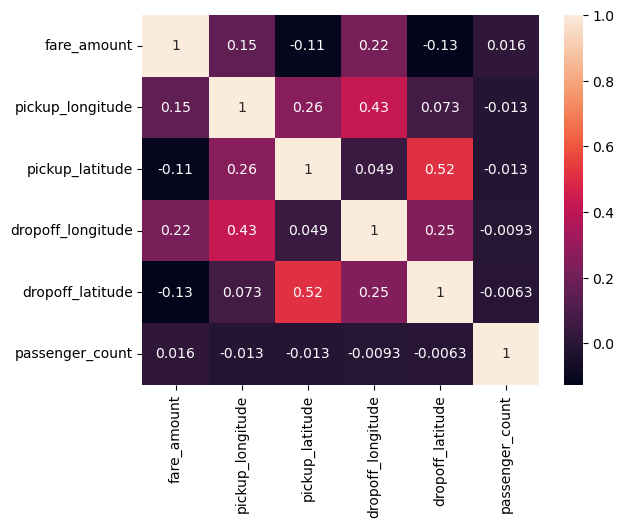

In [111]:
dataplot=sns.heatmap(df.corr(),annot=True)
plt.show()

### 4. Implement linear regression and ridge, Lasso regression models.  


In [117]:
 # Handle missing values by imputing with mean
imputer = SimpleImputer(strategy='mean')
df[['dropoff_longitude', 'dropoff_latitude']] = imputer.fit_transform(df[['dropoff_longitude', 'dropoff_latitude']])

# Define features and target
X = df.drop(columns=['fare_amount'])
y = df['fare_amount']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0)
}


### 5. Evaluate the models and compare their respective scores like R2, RMSE, etc.  


Linear Regression - MSE: 27.040937777893507, R2 Score: 0.09111418491005252
Ridge Regression - MSE: 27.042353236678604, R2 Score: 0.09106660925190835
Lasso Regression - MSE: 29.751840533656377, R2 Score: -3.256394642381366e-06


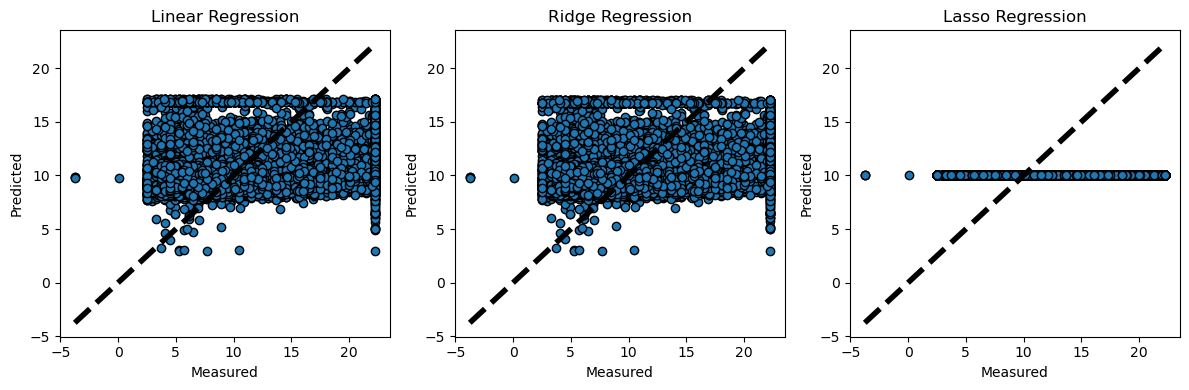

In [115]:
# Train, predict, and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {'MSE': mean_squared_error(y_test, y_pred), 'R2 Score': r2_score(y_test, y_pred)}

# Print evaluation metrics
for name, metrics in results.items():
    print(f"{name} - MSE: {metrics['MSE']}, R2 Score: {metrics['R2 Score']}")

# Visualize predictions
plt.figure(figsize=(12, 4))
for i, (name, model) in enumerate(models.items(), 1):
    y_pred = model.predict(X_test)
    plt.subplot(1, 3, i)
    plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.xlabel('Measured')
    plt.ylabel('Predicted')
    plt.title(name)

plt.tight_layout()
plt.show()
